In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.models import load_model
seed = 29

Processing discretization level: 50
Training fold 1 with 1000 samples...
Training fold 2 with 1000 samples...
Training fold 3 with 1000 samples...
Training fold 4 with 1000 samples...
Training fold 1 with 2000 samples...
Training fold 2 with 2000 samples...
Training fold 3 with 2000 samples...
Training fold 4 with 2000 samples...
Training fold 1 with 4000 samples...
Training fold 2 with 4000 samples...
Training fold 3 with 4000 samples...
Training fold 4 with 4000 samples...
Training fold 1 with 8000 samples...
Training fold 2 with 8000 samples...
Training fold 3 with 8000 samples...
Training fold 4 with 8000 samples...
Training fold 1 with 16000 samples...
Training fold 2 with 16000 samples...
Training fold 3 with 16000 samples...
Training fold 4 with 16000 samples...
Training fold 1 with 32000 samples...
Training fold 2 with 32000 samples...
Training fold 3 with 32000 samples...
Training fold 4 with 32000 samples...
Training fold 1 with 64000 samples...
Training fold 2 with 64000 sam

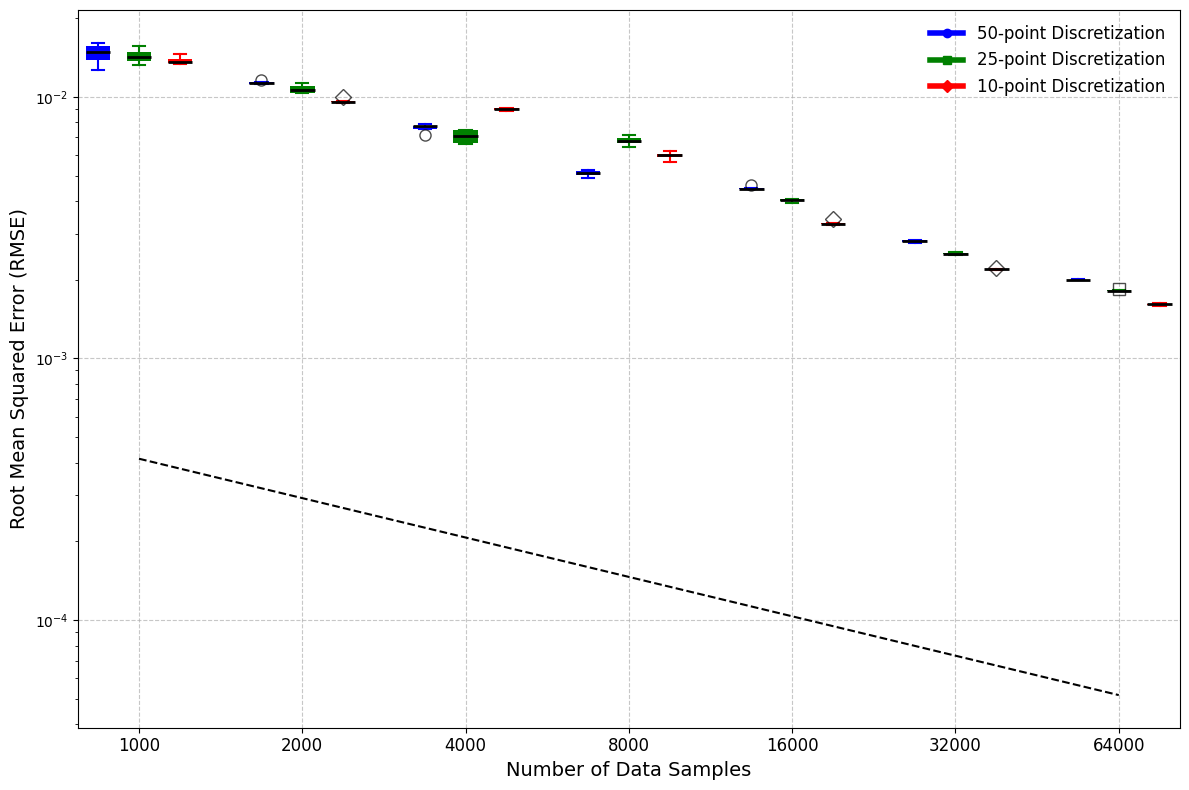

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns

# Parameters
n_splits = 4
n_samples = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
discretizations = [50, 25, 10]
coeff = 1e-6

# Colors and markers for each discretization
colors = {50: 'blue', 25: 'green', 10: 'red'}
markers = {50: 'o', 25: 's', 10: 'D'}
linestyles = {50: '-', 25: '-', 10: '-'}

# Storage for RMSE results
rmse_test_all = {d: [] for d in discretizations}

# Loop over different discretizations
for discretization in discretizations:
    print(f"Processing discretization level: {discretization}")

    X_test = np.loadtxt(f"../../data/50-25-10/X_test_{discretization}resolution.csv" , delimiter = ",")
    y_test = np.loadtxt(f"../../data/50-25-10/y_test_{discretization}resolution.csv" , delimiter = ",")
    X_train = np.loadtxt(f"../../data/50-25-10/X_train_{discretization}resolution.csv" , delimiter = ",")
    y_train = np.loadtxt(f"../../data/50-25-10/y_train_{discretization}resolution.csv" , delimiter = ",")
    
    for n_sample in n_samples:

        kf = KFold(n_splits=n_splits)

        X = X_train[:n_sample,:]
        y = y_train[:n_sample,:]

        rmse_test = []
        
        fold_var = 1
        
        # Perform k-fold cross-validation
        for train_index, val_index in kf.split(X):
            print(f"Training fold {fold_var} with {n_sample} samples...")
            
            # Splitting the data into training and validation sets
            X_train_k, X_val_k = X[train_index], X[val_index]
            y_train_k, y_val_k = y[train_index], y[val_index]

            # Load the model for the current fold and discretization level
            model = load_model(f'./models/model_{discretization}resolution_{n_sample}samples_{fold_var}.keras')

            # Calculate RMSE for training and validation sets
            test_err = model(X_val_k).numpy() - y_val_k
            rmse_test_fold = np.sqrt(np.mean(test_err**2))
            rmse_test.append(rmse_test_fold)
            
            # Increment the fold number
            fold_var += 1
        
        # Store the RMSE results for the current sample size and discretization
        rmse_test_all[discretization].append(rmse_test)
    
# Plotting the results
plt.figure(figsize=(12, 8))

# Create a unified legend
custom_lines = [plt.Line2D([0], [0], color=colors[50], lw=4, linestyle=linestyles[50], marker=markers[50]),
                plt.Line2D([0], [0], color=colors[25], lw=4, linestyle=linestyles[25], marker=markers[25]),
                plt.Line2D([0], [0], color=colors[10], lw=4, linestyle=linestyles[10], marker=markers[10])]

for i, discretization in enumerate(discretizations):
    pos = np.array(range(len(n_samples))) * (len(discretizations) + 1) + i + 1
    boxplot = plt.boxplot(rmse_test_all[discretization], positions=pos, widths=0.6, patch_artist=True,
                          boxprops=dict(facecolor=colors[discretization], edgecolor='none'),
                          medianprops=dict(color='black', linewidth=2),
                          whiskerprops=dict(color=colors[discretization], linewidth=1.5),
                          capprops=dict(color=colors[discretization], linewidth=1.5),
                          flierprops=dict(marker=markers[discretization], color=colors[discretization], alpha=0.7, markersize=8),
                          showfliers=True)

# Plot the convergence line (square root of data samples)
sample_positions = np.arange(1, len(n_samples) * (len(discretizations) + 1), len(discretizations) + 1) + 1
convergence_line = 1 / np.sqrt(n_samples)  # Assume some constant factor
convergence_line *= np.mean([min(rmse_test_all[d][0]) for d in discretizations])  # Scale to RMSE range

plt.plot(sample_positions, convergence_line, 'k--', label=r'$\propto \frac{1}{\sqrt{n}}$')
   
plt.xticks(np.arange(1, len(n_samples) * (len(discretizations) + 1), len(discretizations) + 1) + 1, n_samples, fontsize=12)
plt.xlabel('Number of Data Samples', fontsize=14)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
plt.legend(custom_lines, [f'{d}-point Discretization' for d in discretizations], loc='upper right', fontsize=12, frameon=False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')
plt.tight_layout()
plt.show()

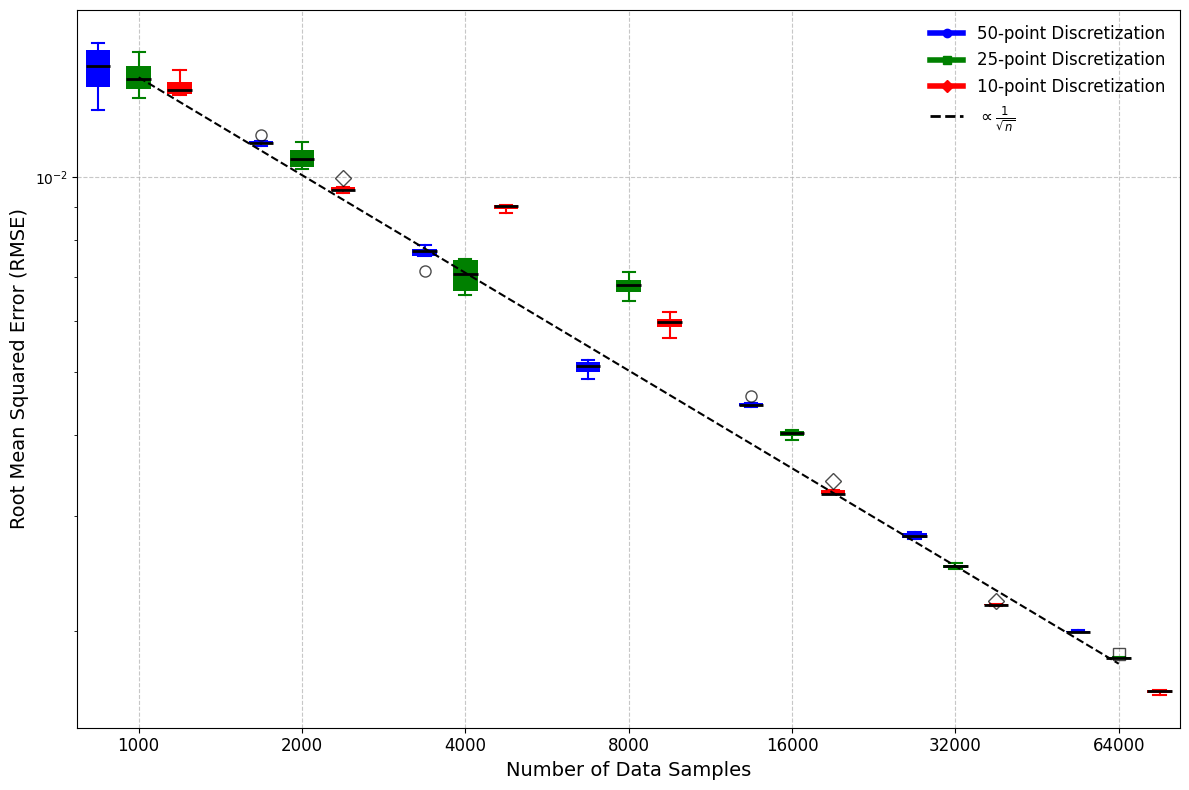

In [34]:
# Plotting the results
plt.figure(figsize=(12, 8))

# Create a unified legend
custom_lines = [plt.Line2D([0], [0], color=colors[50], lw=4, linestyle=linestyles[50], marker=markers[50]),
                plt.Line2D([0], [0], color=colors[25], lw=4, linestyle=linestyles[25], marker=markers[25]),
                plt.Line2D([0], [0], color=colors[10], lw=4, linestyle=linestyles[10], marker=markers[10])]

for i, discretization in enumerate(discretizations):
    pos = np.array(range(len(n_samples))) * (len(discretizations) + 1) + i + 1
    boxplot = plt.boxplot(rmse_test_all[discretization], positions=pos, widths=0.6, patch_artist=True,
                          boxprops=dict(facecolor=colors[discretization], edgecolor='none'),
                          medianprops=dict(color='black', linewidth=2),
                          whiskerprops=dict(color=colors[discretization], linewidth=1.5),
                          capprops=dict(color=colors[discretization], linewidth=1.5),
                          flierprops=dict(marker=markers[discretization], color=colors[discretization], alpha=0.7, markersize=8),
                          showfliers=True)

# Plot the convergence line (square root of data samples)
sample_positions = np.arange(1, len(n_samples) * (len(discretizations) + 1), len(discretizations) + 1) + 1
convergence_line = 1 / np.sqrt(n_samples)  # Assume some constant factor
convergence_line *= np.sqrt(1000)*np.mean([np.mean(rmse_test_all[d][0]) for d in discretizations])  # Scale to RMSE range

plt.plot(sample_positions, convergence_line, 'k--', label=r'$\propto \frac{1}{\sqrt{n}}$')
   
plt.xticks(np.arange(1, len(n_samples) * (len(discretizations) + 1), len(discretizations) + 1) + 1, n_samples, fontsize=12)
plt.xlabel('Number of Data Samples', fontsize=14)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
plt.legend(custom_lines + [plt.Line2D([0], [0], color='black', linestyle='--', lw=2)], 
           [f'{d}-point Discretization' for d in discretizations] + [r'$\propto \frac{1}{\sqrt{n}}$'], 
           loc='upper right', fontsize=12, frameon=False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')
plt.tight_layout()
plt.show()

Processing model: 50resolution
Training fold 1 with 1000 samples...
Training fold 2 with 1000 samples...
Training fold 3 with 1000 samples...
Training fold 4 with 1000 samples...
Training fold 1 with 2000 samples...
Training fold 2 with 2000 samples...
Training fold 3 with 2000 samples...
Training fold 4 with 2000 samples...
Training fold 1 with 4000 samples...
Training fold 2 with 4000 samples...
Training fold 3 with 4000 samples...
Training fold 4 with 4000 samples...
Training fold 1 with 8000 samples...
Training fold 2 with 8000 samples...
Training fold 3 with 8000 samples...
Training fold 4 with 8000 samples...
Training fold 1 with 16000 samples...
Training fold 2 with 16000 samples...
Training fold 3 with 16000 samples...
Training fold 4 with 16000 samples...
Processing model: 50-25resolution
Training fold 1 with 1000 samples...
Training fold 2 with 1000 samples...
Training fold 3 with 1000 samples...
Training fold 4 with 1000 samples...
Training fold 1 with 2000 samples...
Traini

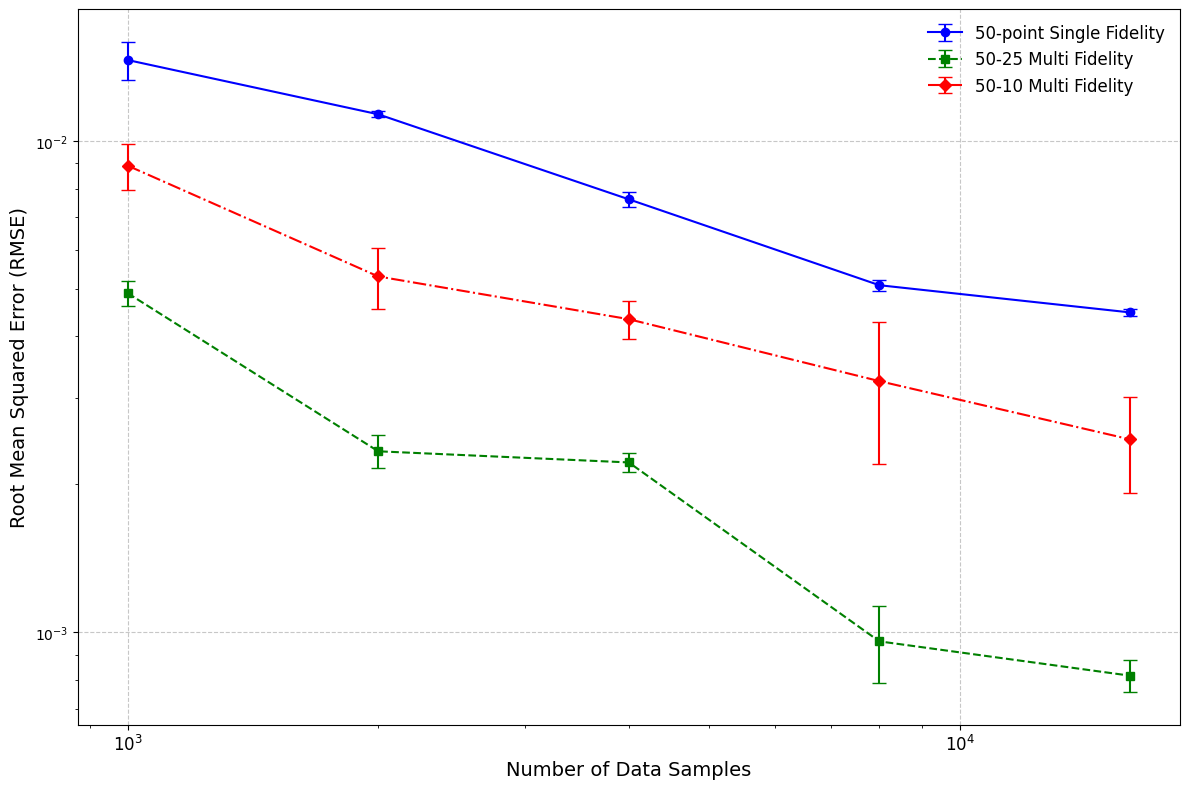

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Parameters
n_splits = 4
n_samples = [1000, 2000, 4000, 8000, 16000]
models = ['50resolution', '50-25resolution', '50-10resolution']
colors = {'50resolution': 'blue', '50-25resolution': 'green', '50-10resolution': 'red'}
markers = {'50resolution': 'o', '50-25resolution': 's', '50-10resolution': 'D'}
linestyles = {'50resolution': '-', '50-25resolution': '--', '50-10resolution': '-.'}

# Storage for RMSE results (mean and standard deviation)
rmse_test_mean = {model: [] for model in models}
rmse_test_std = {model: [] for model in models}

# Loop over different models
for model in models:
    print(f"Processing model: {model}")

    # Load data according to the model
    if model == '50resolution':
        X_train = np.loadtxt("../../data/50-25-10/X_train_50resolution.csv", delimiter=",")
        y_train = np.loadtxt("../../data/50-25-10/y_train_50resolution.csv", delimiter=",")
    elif model == '50-25resolution':
        X_train_50 = np.loadtxt("../../data/50-25-10/X_train_50resolution.csv", delimiter=",")
        X_train_25 = np.loadtxt("../../data/50-25-10/y_train_25resolution_mfdata.csv", delimiter=",")
        y_train = np.loadtxt("../../data/50-25-10/y_train_50resolution.csv", delimiter=",")
    elif model == '50-10resolution':
        X_train_50 = np.loadtxt("../../data/50-25-10/X_train_50resolution.csv", delimiter=",")
        X_train_10 = np.loadtxt("../../data/50-25-10/y_train_10resolution_mfdata.csv", delimiter=",")
        y_train = np.loadtxt("../../data/50-25-10/y_train_50resolution.csv", delimiter=",")

    for n_sample in n_samples:

        kf = KFold(n_splits=n_splits)

        if model == '50resolution':
            X = X_train[:n_sample, :]
        elif model == '50-25resolution':
            X = (X_train_50[:n_sample, :], X_train_25[:n_sample, :])
        elif model == '50-10resolution':
            X = (X_train_50[:n_sample, :], X_train_10[:n_sample, :])
            
        y = y_train[:n_sample, :]

        rmse_test = []
        
        fold_var = 1
        
        # Perform k-fold cross-validation
        for train_index, val_index in kf.split(y):  # Only split y to keep tuples intact for X
            print(f"Training fold {fold_var} with {n_sample} samples...")

            # Splitting the data into training and validation sets
            if model == '50resolution':
                X_train_k, X_val_k = X[train_index], X[val_index]
            else:  # Multi-fidelity models
                X_train_k = (X[0][train_index], X[1][train_index])
                X_val_k = (X[0][val_index], X[1][val_index])
            
            y_train_k, y_val_k = y[train_index], y[val_index]

            # Load the model for the current fold and model type
            model_path = f'./models/model_{model}_{n_sample}samples_{fold_var}.keras'
            trained_model = load_model(model_path)

            # Calculate RMSE for validation set
            test_err = trained_model(X_val_k).numpy() - y_val_k
            rmse_test_fold = np.sqrt(np.mean(test_err**2))
            rmse_test.append(rmse_test_fold)
            
            # Increment the fold number
            fold_var += 1
        
        # Store the mean and standard deviation of RMSE results for the current sample size and model
        rmse_test_mean[model].append(np.mean(rmse_test))
        rmse_test_std[model].append(np.std(rmse_test))

# Plotting the results
plt.figure(figsize=(12, 8))

for model in models:
    plt.errorbar(n_samples, rmse_test_mean[model], yerr=rmse_test_std[model], linestyle=linestyles[model],
                 marker=markers[model], color=colors[model], label=model, capsize=5)

plt.xticks(n_samples, fontsize=12)
plt.xlabel('Number of Data Samples', fontsize=14)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
plt.legend(['50-point Single Fidelity', '50-25 Multi Fidelity', '50-10 Multi Fidelity', r'$\propto \frac{1}{\sqrt{n}}$'], loc='upper right', fontsize=12, frameon=False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.show()